In [1]:
import  pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from pathlib import Path
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
path = Path.cwd()
path = str(path)+'/GFMS DB/'
path

'/Users/keumhyeonjun/Projects/행안부/자재/GFMS DB/'

In [3]:
FMSA11_작업장비이력 = pd.read_excel(path + 'FMSA11_작업장비이력.xlsx')
FMSX05_장비마스터 = pd.read_csv(path + 'FMSX05_장비마스터_ver2.csv')


In [4]:
equipment = pd.merge(FMSA11_작업장비이력, FMSX05_장비마스터, how='inner', on='fac_cd')
equipment

,comp_cd_x,job_cd,fac_cd,job_cont,input_sysdt_x,chg_sysdt_x,input_emp_no_x,chg_emp_no_x,input_scr_nm_x,Unnamed: 0,...,chk_edit_dt,law_fac_yn,class_nm_1,class_nm_2,class_nm_3,class_nm_4,class_cd_1,class_cd_2,class_cd_3,class_cd_4
0,SEJO,211001-00002,400201020417,NaN,2021-10-27 오후 3:27:52,NaN,korea8012,NaN,JOB_A11,27510,...,NaN,N,방재,경보설비,자동화재탐지설비,감지기,40,4002,400201,40020102
1,SEJO,211008-00047,400201020417,NaN,2021-10-27 오후 3:29:23,NaN,korea8012,NaN,JOB_A11,27510,...,NaN,N,방재,경보설비,자동화재탐지설비,감지기,40,4002,400201,40020102
2,SEJO,211001-00003,400201020817,NaN,2021-10-20 오전 9:07:24,NaN,tjsrb3183,NaN,JOB_A11,36504,...,NaN,NaN,방재,경보설비,자동화재탐지설비,감지기,40,4002,400201,40020102
3,SEJO,211002-00005,400201020817,NaN,2021-10-20 오전 9:08:46,NaN,tjsrb3183,NaN,JOB_A11,36504,...,NaN,NaN,방재,경보설비,자동화재탐지설비,감지기,40,4002,400201,40020102
4,SEJO,220625-00008,400201020817,NaN,2022-06-26 오전 12:15:10,NaN,tjsrb3183,NaN,JOB_A11,36504,...,NaN,NaN,방재,경보설비,자동화재탐지설비,감지기,40,4002,400201,40020102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,SEJO,M_202206231505243_001,500102050031,NaN,2022-06-23 오후 4:44:34,NaN,archi1,NaN,JOB_A11,33136,...,NaN,NaN,건축,내부,내벽마감재,방화문,50,5001,500102,50010205
6827,SEJO,M_202207011346422_001,200201020170,NaN,2022-07-11 오전 9:13:11,NaN,as119,NaN,JOB_A11,30791,...,NaN,N,기계,"위생, 탱크설비",위생설비,소변기,20,2002,200201,20020102
6828,SEJO,M_202208021424204_001,200201020133,NaN,2022-08-02 오후 2:41:33,NaN,berdan10,NaN,M_JOB_A11,31218,...,NaN,N,기계,"위생, 탱크설비",위생설비,소변기,20,2002,200201,20020102
6829,SEJO,M_202208021424204_001,200201020167,NaN,2022-08-02 오후 2:41:33,NaN,berdan10,NaN,M_JOB_A11,31216,...,NaN,N,기계,"위생, 탱크설비",위생설비,소변기,20,2002,200201,20020102


In [5]:
equipment['job_cd'].value_counts()

211112-00057             52
220907-00102             48
220825-00057             48
211203-00062             42
220209-00059             42
                         ..
220929-00025              1
211202-00064              1
220323-00062              1
211202-00063              1
M_202208221057315_001     1
Name: job_cd, Length: 5120, dtype: int64

Text(0.5, 1.0, '장애장비 분류(계층1)')

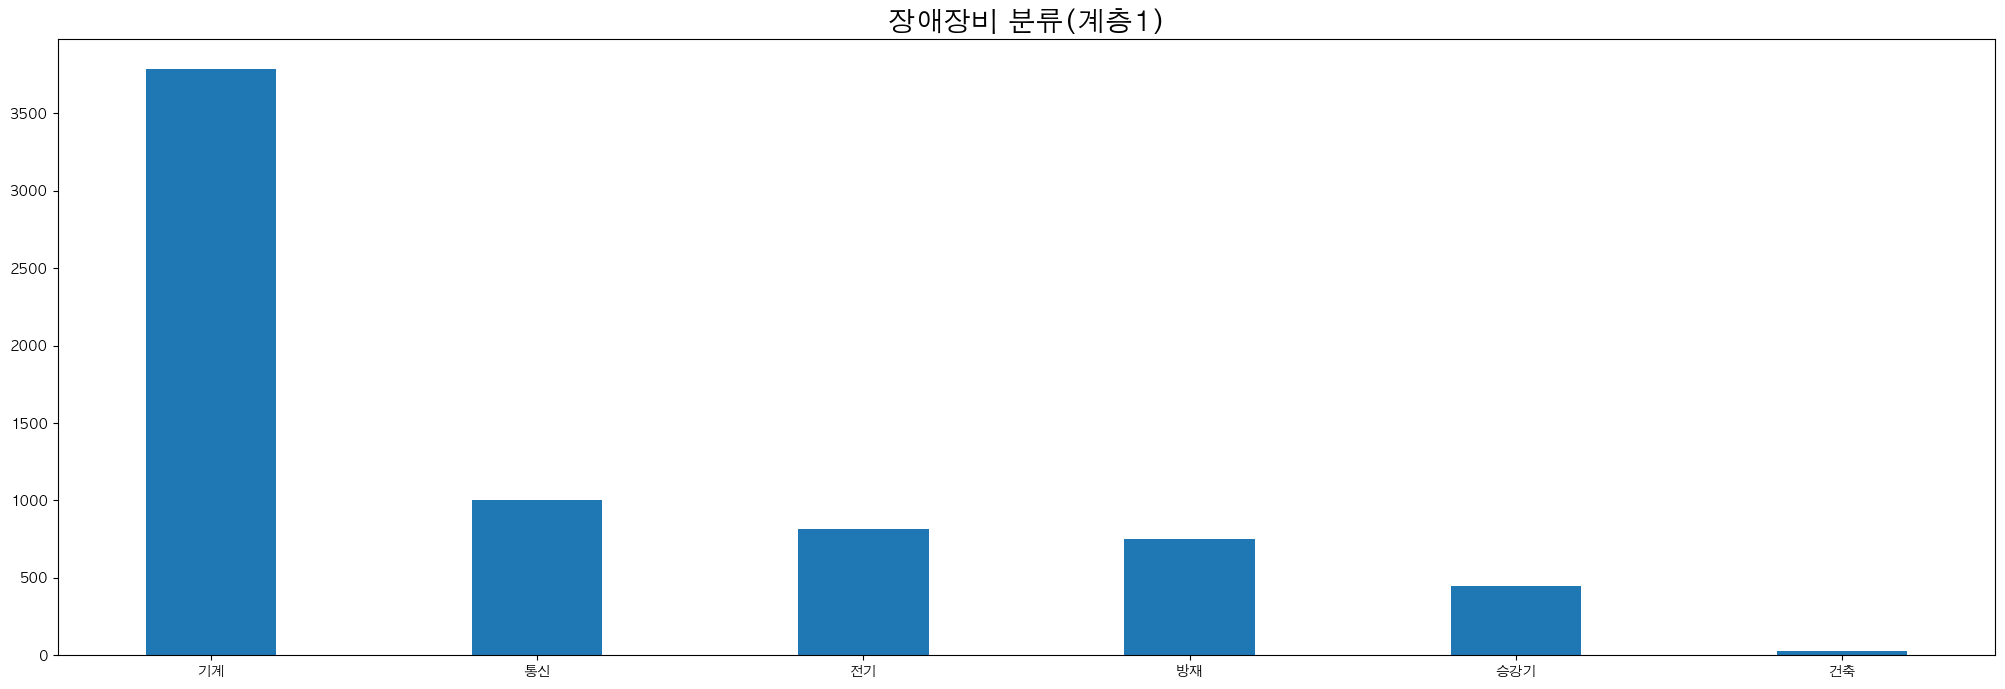

In [6]:
df = pd.DataFrame(equipment['class_nm_1'].value_counts(ascending=False))
df.reset_index(inplace=True)
#df = df.sort_values('index')

plt.figure(figsize=(25,8), facecolor='white')
plt.bar(df['index'], df['class_nm_1'], width=0.4)
plt.title('장애장비 분류(계층1)',fontsize=20)


In [7]:
equipment['class_nm_1'].value_counts(ascending=False)

기계     3788
통신     1003
전기      815
방재      748
승강기     447
건축       30
Name: class_nm_1, dtype: int64

# 기계

In [8]:
기계 = equipment[equipment['class_nm_1']=='기계']
기계['class_nm_4'].value_counts(ascending=False)

소변기           488
세면대 수전        462
대변기           432
냉각탑           349
개별냉난방기 실내기    309
             ... 
분배기(헤더)         1
항온항습기 실외기       1
가스여과기           1
미세입자제거기         1
쓰레기 이송설비        1
Name: class_nm_4, Length: 61, dtype: int64

## 통신

In [9]:
통신 = equipment[equipment['class_nm_1']=='통신']
통신['class_nm_4'].value_counts(ascending=False)

CCTV 카메라        230
스피드게이트          198
얼굴인식            117
통제식회전문           92
CCTV 서버          89
울타리감지기           50
출입제어기            48
출입문제어기           40
CCTV 저장장치        34
앰프               17
기타장비             15
키오스크             15
지문/정맥인식기          9
스피커               7
동작감지센서            6
업무망 네트워크 장비       6
인터넷망 네트워크 장비      5
중회의실              5
비상호출통화장치          4
서버                3
승강기모니터            3
네트워크 장비           3
SI서버              2
통합배선              1
출입통제서버            1
대회의실              1
구내식당 TV           1
대강당               1
Name: class_nm_4, dtype: int64

## 전기

In [10]:
전기 = equipment[equipment['class_nm_1']=='전기']
전기['class_nm_4'].value_counts(ascending=False)

옥외 및 기타         255
옥내 LED 조명       201
EPS실            155
주차관제             40
비상발전기            30
옥외 LED 조명        27
옥내 일반 조명         18
무정전원공급장치         17
배전반              15
전기차충전            11
무대장치              9
공조(휀룸)실           7
기계실               5
태양광발전             4
TPS실              3
항온항습기실            3
변압기반              3
승강기 기계실 및 기타      2
전기온돌              2
특고압반              2
스노우멜팅             1
원격검침              1
통신(방송)실           1
조명제어              1
피뢰설비              1
전력제어              1
Name: class_nm_4, dtype: int64

## 방재

In [11]:
방재 = equipment[equipment['class_nm_1']=='방재']
방재['class_nm_4'].value_counts(ascending=False)

감지기          161
피난구 유도등      120
이동식           95
거실통로 유도등      79
복도통로 유도등      64
밸브            46
계단 유도등        22
헤드            20
전원            19
비상벨           16
수신기           12
방화셔터          11
스프링클러         10
수조             9
집합관            8
겸용             7
중계기            7
발신기            5
전원반            5
옥내소화전설비        5
고정식            5
옥외소화전설비        5
전실제연설비         4
완강기            3
휴대용 비상조명등      3
시각경보기          2
캐비넷            1
연동제어기          1
모듈러            1
소화전            1
개폐기            1
Name: class_nm_4, dtype: int64

In [12]:

승강기 = equipment[equipment['class_nm_1']=='승강기']
승강기['class_nm_4'].value_counts(ascending=False)

카         181
승강로       110
제어반       104
승강장        35
권상기        10
PC          5
비상통화장치      2
Name: class_nm_4, dtype: int64

# 아무것도 아님 급해서 하는거임

In [13]:
df = pd.read_excel('/Users/keumhyeonjun/Projects/행안부/자재/GFMS DB/FMSB30_자재재고.xlsx')

In [14]:
df[df['inv_qty']==426785]

,comp_cd,mat_cd,wh_cd,loc,mat_nm,mat_type,mat_unit,mat_gb,mat_level,inv_qty,...,input_sysdt,chg_sysdt,input_emp_no,chg_emp_no,input_scr_nm,first_yn,first_qty,dong_cd,old_mat_cd,new_mat_cd
8445,SEJO,1105001001001,25,NaN,화장지,50m/묶음100롤,롤,2,A,426785,...,2022-09-01 오전 10:08:09,2022-09-01 오후 3:00:58,ADMIN1,kim5479,MAT_C12,NaN,NaN,NaN,NaN,NaN


In [19]:
df[df['mat_nm'] == '알칼리건전지']['inv_qty'].sum()

4808

In [16]:
df2 = pd.read_excel('/Users/keumhyeonjun/Projects/행안부/자재/GFMS DB/FMSB07_자재출고.xlsx')
df2

,comp_cd,outw_cd,job_cd,outw_tpy,outw_day,mat_cd,outw_qty,outw_amt,outw_use,outw_empno,...,gyuljae_no1,gyuljae_no2,gyuljae_no3,gyuljae_no4,gyuljae_no5,gyuljae_yn,return_qty,mat_check_gb,old_mat_cd,new_mat_cd
0,SEJO,A211001-00012,211001-00059,1,2021-10-01,413002005001,1,1.0,NaN,Jk1495,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1,SEJO,A211001-00005,211001-00081,1,2021-10-01,504001002002,1,1.0,NaN,skysen83,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN
2,SEJO,A211001-00014,211001-00070,1,2021-10-01,802001001001,1,1.0,NaN,hugh7192,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
3,SEJO,A211001-00015,211001-00070,1,2021-10-01,407001001005,1,1.0,NaN,hugh7192,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
4,SEJO,A211001-00001,211001-00038,1,2021-10-01,413002005005,1,1.0,NaN,sueoh0202,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,SEJO,A221011-00019,221011-00065,1,2022-10-11,701003004012,4,NaN,NaN,ipt1264,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
5718,SEJO,A221011-00020,221011-00065,1,2022-10-11,701003004014,2,NaN,NaN,ipt1264,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
5719,SEJO,A221011-00021,221011-00065,1,2022-10-11,701003004015,2,NaN,NaN,ipt1264,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
5720,SEJO,A221011-00015,221011-00057,1,2022-10-11,412005002004,2,NaN,NaN,as119,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN


In [33]:
건전지 = df2[df2['mat_nm']=='알칼리건전지'][['outw_day','outw_qty']]
건전지
건전지['outw_day'] = pd.to_datetime(건전지['outw_day'])
건전지['월'] = 건전지['outw_day'].dt.month
건전지['년'] = 건전지['outw_day'].dt.year
건전지['년월'] = 건전지['년'].astype(str) + '-' +  건전지['월'].astype(str)
건전지

,outw_day,outw_qty,월,년,년월
29,2021-10-05,4,10,2021,2021-10
30,2021-10-05,4,10,2021,2021-10
34,2021-10-05,4,10,2021,2021-10
35,2021-10-05,8,10,2021,2021-10
50,2021-10-06,4,10,2021,2021-10
...,...,...,...,...,...
5663,2022-10-06,4,10,2022,2022-10
5664,2022-10-06,4,10,2022,2022-10
5685,2022-10-07,8,10,2022,2022-10
5686,2022-10-07,8,10,2022,2022-10


In [35]:
data = 건전지['outw_qty'].groupby(건전지['년월'])
data.sum()

년월
2021-10    291
2021-11    223
2021-12    356
2022-1     150
2022-10    837
2022-2     532
2022-3     396
2022-4     155
2022-5     230
2022-6     344
2022-7     329
2022-8     430
2022-9     288
Name: outw_qty, dtype: int64

In [18]:
df2[df2['job_cd']=='211229-00040']

,comp_cd,outw_cd,job_cd,outw_tpy,outw_day,mat_cd,outw_qty,outw_amt,outw_use,outw_empno,...,gyuljae_no1,gyuljae_no2,gyuljae_no3,gyuljae_no4,gyuljae_no5,gyuljae_yn,return_qty,mat_check_gb,old_mat_cd,new_mat_cd
1310,SEJO,A211229-00004,211229-00040,1,2021-12-29,107002017007,3,3.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1311,SEJO,A211229-00005,211229-00040,1,2021-12-29,107002017011,3,3.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1312,SEJO,A211229-00006,211229-00040,1,2021-12-29,108002024001,3,3.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1313,SEJO,A211229-00007,211229-00040,1,2021-12-29,107005006002,4,4.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1314,SEJO,A211229-00008,211229-00040,1,2021-12-29,107005012001,3,3.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1315,SEJO,A211229-00009,211229-00040,1,2021-12-29,107005018002,1,1.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1316,SEJO,A211229-00010,211229-00040,1,2021-12-29,107005018003,2,2.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1317,SEJO,A211229-00011,211229-00040,1,2021-12-29,107005018004,1,1.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1318,SEJO,A211229-00012,211229-00040,1,2021-12-29,107005038002,4,4.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1319,SEJO,A211229-00013,211229-00040,1,2021-12-29,107005039002,4,4.0,NaN,ipt1261,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
